![example](images/director_shot.jpeg)

# Project Title

**Authors:** Ryan Sajac
***

## Overview

Microsoft is venturing into the exciting world of movie making. While a first movie is a wonderful opportunity to diversify the company, movie making can be a risky investment. Microsoft needs to think about the cost of production, first time needs, and the safest way to expand into the market. Microsoft wants to target the largest possible audience, or at least generate the most revenue. 

Using the genre, runtime, budgets, and gross earnings, we recommend that the best way for Microsoft to safely generate a substantial profit is to direct a movie under the animation genre with a runtime between 95 and 105 minutes as supported by the findings in our comparisons of genre vs. total gross. Our findings are detailed below. 

## Business Problem

#### Microsoft must be most interested in two things, how to get a large return on investment, and how to limit risk in accomplishing that task. 

For these two pain points, the questions we need to answer in our data analysis are:
1. What type of genres are most likely to be most profitable? 
2. What runtimes are most likely to produce higher profit?
3. Which genre limits the risk on return of investment? 

From a business perspective, these questions are important to answer because Microsoft needs to establish itself as a key player in the market early on. It can either do that by taking a big risk and hitting it out of the park (question 3), or by playing it safe and producing a movie that is likely to succeed, and continuing to build safely by producing 'safe' movies and diversifying by targeting those that are 'riskier' in terms of return on investment. 
***

## Data Understanding

#### Target Variable - Profit

Microsoft's goal is to make money in this venture. 

Data is from Rotten Tomatoes, and IMDB. These sites contain information about gross, budget, runtimes, and genres of movies. We need to correlate this information to determine what are recommendations will be for Microsoft. 

I included the following files:
* imdb_title_basics_csv_gz - has genres, runtime minutes, and title
* bom_movie_gross_csv_gz - has the domestic and foreign gross, and title
* tn.movie_budgets.csv.gz - has the budget, and title

I can join these three tables to get relationships among the data to find answers to our questions. Once joined, the dataframe has 1001 movie entries with 17 columns. The most relevant columns for our analysis were: 
* Production Budget
* Runtime Minutes
* Worldwide Gross

I created two further columns:
* Profit
* Gross-to-cost-Ratio

While profit is our target variable, Gross-to-cost-ratio helped to indicate the risk of a certain genre. 

With more time we could have narrowed down a short list of directors based on titles that have done well for Microsoft to choose from. 
***

In [72]:
# Import standard packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [73]:
# Here we import glob to find the data files that we have on hand. #
import glob, os
fpath = 'zippedData/'
os.listdir(fpath)

['imdb.title.crew.csv.gz',
 'tmdb.movies.csv.gz',
 'imdb.title.akas.csv.gz',
 'imdb.title.ratings.csv.gz',
 'imdb.name.basics.csv.gz',
 'rt.reviews.tsv.gz',
 'imdb.title.basics.csv.gz',
 'rt.movie_info.tsv.gz',
 'tn.movie_budgets.csv.gz',
 'bom.movie_gross.csv.gz',
 'imdb.title.principals.csv.gz']

In [74]:
# I made a list of all my files. 
query = fpath+'*.gz'
file_list = glob.glob(query)

In [75]:
"""I looped through the list of files to create a dictionary
and display the head and tail so that we can choose which dataframes
are most applicable for our analysis.""" 

tables = {}
for file in file_list:
    print('---'*20)
    filename = file.replace('zippedData/', '').replace('.', '_')
    print(filename)
    if '.tsv.gz' in file:
        temp_df = pd.read_csv(file, sep='\t', encoding='latin-1')
    else: 
        temp_df = pd.read_csv(file)
    display(temp_df.head(), temp_df.tail())
    
    tables[filename] = temp_df 

------------------------------------------------------------
imdb_title_crew_csv_gz


,tconst,directors,writers
0,tt0285252,nm0899854,nm0899854
1,tt0438973,NaN,"nm0175726,nm1802864"
2,tt0462036,nm1940585,nm1940585
3,tt0835418,nm0151540,"nm0310087,nm0841532"
4,tt0878654,"nm0089502,nm2291498,nm2292011",nm0284943


,tconst,directors,writers
146139,tt8999974,nm10122357,nm10122357
146140,tt9001390,nm6711477,nm6711477
146141,tt9001494,"nm10123242,nm10123248",NaN
146142,tt9004986,nm4993825,nm4993825
146143,tt9010172,NaN,nm8352242


------------------------------------------------------------
tmdb_movies_csv_gz


,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186


,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
26512,26512,"[27, 18]",488143,en,Laboratory Conditions,0.6,2018-10-13,Laboratory Conditions,0.0,1
26513,26513,"[18, 53]",485975,en,_EXHIBIT_84xxx_,0.6,2018-05-01,_EXHIBIT_84xxx_,0.0,1
26514,26514,"[14, 28, 12]",381231,en,The Last One,0.6,2018-10-01,The Last One,0.0,1
26515,26515,"[10751, 12, 28]",366854,en,Trailer Made,0.6,2018-06-22,Trailer Made,0.0,1
26516,26516,"[53, 27]",309885,en,The Church,0.6,2018-10-05,The Church,0.0,1


------------------------------------------------------------
imdb_title_akas_csv_gz


,title_id,ordering,title,region,language,types,attributes,is_original_title
0,tt0369610,10,Джурасик свят,BG,bg,NaN,NaN,0.0
1,tt0369610,11,Jurashikku warudo,JP,NaN,imdbDisplay,NaN,0.0
2,tt0369610,12,Jurassic World: O Mundo dos Dinossauros,BR,NaN,imdbDisplay,NaN,0.0
3,tt0369610,13,O Mundo dos Dinossauros,BR,NaN,NaN,short title,0.0
4,tt0369610,14,Jurassic World,FR,NaN,imdbDisplay,NaN,0.0


,title_id,ordering,title,region,language,types,attributes,is_original_title
331698,tt9827784,2,Sayonara kuchibiru,NaN,NaN,original,NaN,1.0
331699,tt9827784,3,Farewell Song,XWW,en,imdbDisplay,NaN,0.0
331700,tt9880178,1,La atención,NaN,NaN,original,NaN,1.0
331701,tt9880178,2,La atención,ES,NaN,NaN,NaN,0.0
331702,tt9880178,3,The Attention,XWW,en,imdbDisplay,NaN,0.0


------------------------------------------------------------
imdb_title_ratings_csv_gz


,tconst,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21


,tconst,averagerating,numvotes
73851,tt9805820,8.1,25
73852,tt9844256,7.5,24
73853,tt9851050,4.7,14
73854,tt9886934,7.0,5
73855,tt9894098,6.3,128


------------------------------------------------------------
imdb_name_basics_csv_gz


,nconst,primary_name,birth_year,death_year,primary_profession,known_for_titles
0,nm0061671,Mary Ellen Bauder,NaN,NaN,"miscellaneous,production_manager,producer","tt0837562,tt2398241,tt0844471,tt0118553"
1,nm0061865,Joseph Bauer,NaN,NaN,"composer,music_department,sound_department","tt0896534,tt6791238,tt0287072,tt1682940"
2,nm0062070,Bruce Baum,NaN,NaN,"miscellaneous,actor,writer","tt1470654,tt0363631,tt0104030,tt0102898"
3,nm0062195,Axel Baumann,NaN,NaN,"camera_department,cinematographer,art_department","tt0114371,tt2004304,tt1618448,tt1224387"
4,nm0062798,Pete Baxter,NaN,NaN,"production_designer,art_department,set_decorator","tt0452644,tt0452692,tt3458030,tt2178256"


,nconst,primary_name,birth_year,death_year,primary_profession,known_for_titles
606643,nm9990381,Susan Grobes,NaN,NaN,actress,NaN
606644,nm9990690,Joo Yeon So,NaN,NaN,actress,"tt9090932,tt8737130"
606645,nm9991320,Madeline Smith,NaN,NaN,actress,"tt8734436,tt9615610"
606646,nm9991786,Michelle Modigliani,NaN,NaN,producer,NaN
606647,nm9993380,Pegasus Envoyé,NaN,NaN,"director,actor,writer",tt8743182


------------------------------------------------------------
rt_reviews_tsv_gz


,id,review,rating,fresh,critic,top_critic,publisher,date
0,3,A distinctly gallows take on contemporary fina...,3/5,fresh,PJ Nabarro,0,Patrick Nabarro,"November 10, 2018"
1,3,It's an allegory in search of a meaning that n...,NaN,rotten,Annalee Newitz,0,io9.com,"May 23, 2018"
2,3,... life lived in a bubble in financial dealin...,NaN,fresh,Sean Axmaker,0,Stream on Demand,"January 4, 2018"
3,3,Continuing along a line introduced in last yea...,NaN,fresh,Daniel Kasman,0,MUBI,"November 16, 2017"
4,3,... a perverse twist on neorealism...,NaN,fresh,NaN,0,Cinema Scope,"October 12, 2017"


,id,review,rating,fresh,critic,top_critic,publisher,date
54427,2000,The real charm of this trifle is the deadpan c...,NaN,fresh,Laura Sinagra,1,Village Voice,"September 24, 2002"
54428,2000,NaN,1/5,rotten,Michael Szymanski,0,Zap2it.com,"September 21, 2005"
54429,2000,NaN,2/5,rotten,Emanuel Levy,0,EmanuelLevy.Com,"July 17, 2005"
54430,2000,NaN,2.5/5,rotten,Christopher Null,0,Filmcritic.com,"September 7, 2003"
54431,2000,NaN,3/5,fresh,Nicolas Lacroix,0,Showbizz.net,"November 12, 2002"


------------------------------------------------------------
imdb_title_basics_csv_gz


,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


,tconst,primary_title,original_title,start_year,runtime_minutes,genres
146139,tt9916538,Kuambil Lagi Hatiku,Kuambil Lagi Hatiku,2019,123.0,Drama
146140,tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,NaN,Documentary
146141,tt9916706,Dankyavar Danka,Dankyavar Danka,2013,NaN,Comedy
146142,tt9916730,6 Gunn,6 Gunn,2017,116.0,NaN
146143,tt9916754,Chico Albuquerque - Revelações,Chico Albuquerque - Revelações,2013,NaN,Documentary


------------------------------------------------------------
rt_movie_info_tsv_gz


,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
2,5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000",NaN,NaN,116 minutes,NaN
3,6,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,"Dec 9, 1994","Aug 27, 1997",NaN,NaN,128 minutes,NaN
4,7,NaN,NR,Drama|Romance,Rodney Bennett,Giles Cooper,NaN,NaN,NaN,NaN,200 minutes,NaN


,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
1555,1996,Forget terrorists or hijackers -- there's a ha...,R,Action and Adventure|Horror|Mystery and Suspense,NaN,NaN,"Aug 18, 2006","Jan 2, 2007",$,"33,886,034",106 minutes,New Line Cinema
1556,1997,The popular Saturday Night Live sketch was exp...,PG,Comedy|Science Fiction and Fantasy,Steve Barron,Terry Turner|Tom Davis|Dan Aykroyd|Bonnie Turner,"Jul 23, 1993","Apr 17, 2001",NaN,NaN,88 minutes,Paramount Vantage
1557,1998,"Based on a novel by Richard Powell, when the l...",G,Classics|Comedy|Drama|Musical and Performing Arts,Gordon Douglas,NaN,"Jan 1, 1962","May 11, 2004",NaN,NaN,111 minutes,NaN
1558,1999,The Sandlot is a coming-of-age story about a g...,PG,Comedy|Drama|Kids and Family|Sports and Fitness,David Mickey Evans,David Mickey Evans|Robert Gunter,"Apr 1, 1993","Jan 29, 2002",NaN,NaN,101 minutes,NaN
1559,2000,"Suspended from the force, Paris cop Hubert is ...",R,Action and Adventure|Art House and Internation...,NaN,Luc Besson,"Sep 27, 2001","Feb 11, 2003",NaN,NaN,94 minutes,Columbia Pictures


------------------------------------------------------------
tn_movie_budgets_csv_gz


,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
5777,78,"Dec 31, 2018",Red 11,"$7,000",$0,$0
5778,79,"Apr 2, 1999",Following,"$6,000","$48,482","$240,495"
5779,80,"Jul 13, 2005",Return to the Land of Wonders,"$5,000","$1,338","$1,338"
5780,81,"Sep 29, 2015",A Plague So Pleasant,"$1,400",$0,$0
5781,82,"Aug 5, 2005",My Date With Drew,"$1,100","$181,041","$181,041"


------------------------------------------------------------
bom_movie_gross_csv_gz


,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


,title,studio,domestic_gross,foreign_gross,year
3382,The Quake,Magn.,6200.0,NaN,2018
3383,Edward II (2018 re-release),FM,4800.0,NaN,2018
3384,El Pacto,Sony,2500.0,NaN,2018
3385,The Swan,Synergetic,2400.0,NaN,2018
3386,An Actor Prepares,Grav.,1700.0,NaN,2018


------------------------------------------------------------
imdb_title_principals_csv_gz


,tconst,ordering,nconst,category,job,characters
0,tt0111414,1,nm0246005,actor,NaN,"[""The Man""]"
1,tt0111414,2,nm0398271,director,NaN,NaN
2,tt0111414,3,nm3739909,producer,producer,NaN
3,tt0323808,10,nm0059247,editor,NaN,NaN
4,tt0323808,1,nm3579312,actress,NaN,"[""Beth Boothby""]"


,tconst,ordering,nconst,category,job,characters
1028181,tt9692684,1,nm0186469,actor,NaN,"[""Ebenezer Scrooge""]"
1028182,tt9692684,2,nm4929530,self,NaN,"[""Herself"",""Regan""]"
1028183,tt9692684,3,nm10441594,director,NaN,NaN
1028184,tt9692684,4,nm6009913,writer,writer,NaN
1028185,tt9692684,5,nm10441595,producer,producer,NaN


In [76]:
"""We will combine three dataframes to get the information into one dataframe.
We drop duplicates in our table with the same title and domestic gross
acknowledging that there are some movies with the same name, but unlikely 
the same domestic gross."""

basics = tables['imdb_title_basics_csv_gz'].copy()
gross = tables['bom_movie_gross_csv_gz'].copy()
budgets = tables['tn_movie_budgets_csv_gz'].copy()

tempcombined = pd.merge(gross, basics, left_on = ['title', 'year'], 
                        right_on = ['original_title','start_year'])
tempcombined

,title,studio,domestic_gross,foreign_gross,year,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,Toy Story 3,BV,415000000.0,652000000,2010,tt0435761,Toy Story 3,Toy Story 3,2010,103.0,"Adventure,Animation,Comedy"
1,Inception,WB,292600000.0,535700000,2010,tt1375666,Inception,Inception,2010,148.0,"Action,Adventure,Sci-Fi"
2,Shrek Forever After,P/DW,238700000.0,513900000,2010,tt0892791,Shrek Forever After,Shrek Forever After,2010,93.0,"Adventure,Animation,Comedy"
3,The Twilight Saga: Eclipse,Sum.,300500000.0,398000000,2010,tt1325004,The Twilight Saga: Eclipse,The Twilight Saga: Eclipse,2010,124.0,"Adventure,Drama,Fantasy"
4,Iron Man 2,Par.,312400000.0,311500000,2010,tt1228705,Iron Man 2,Iron Man 2,2010,124.0,"Action,Adventure,Sci-Fi"
...,...,...,...,...,...,...,...,...,...,...,...
1661,The House That Jack Built,IFC,88000.0,NaN,2018,tt4003440,The House That Jack Built,The House That Jack Built,2018,152.0,"Crime,Drama,Horror"
1662,Helicopter Eela,Eros,72000.0,NaN,2018,tt8427036,Helicopter Eela,Helicopter Eela,2018,135.0,Drama
1663,Oolong Courtyard,CL,37700.0,NaN,2018,tt8549902,Oolong Courtyard: KungFu School,Oolong Courtyard,2018,103.0,Comedy
1664,The Workshop,Strand,22100.0,NaN,2018,tt7405478,The Workshop,The Workshop,2018,80.0,Thriller


In [77]:
"""The size of our movie info is 1001 rows (movies) and 17 columns of 
information about that movie.""" 

movie_info_temp = pd.merge(tempcombined, budgets, left_on = 'title', 
                      right_on = 'movie')

movie_info = movie_info_temp.drop_duplicates(keep = False, subset =['title',
                            'original_title', 'domestic_gross_x'])
movie_info.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1001 entries, 0 to 1063
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   title              1001 non-null   object 
 1   studio             1001 non-null   object 
 2   domestic_gross_x   1000 non-null   float64
 3   foreign_gross      901 non-null    object 
 4   year               1001 non-null   int64  
 5   tconst             1001 non-null   object 
 6   primary_title      1001 non-null   object 
 7   original_title     1001 non-null   object 
 8   start_year         1001 non-null   int64  
 9   runtime_minutes    1000 non-null   float64
 10  genres             1001 non-null   object 
 11  id                 1001 non-null   int64  
 12  release_date       1001 non-null   object 
 13  movie              1001 non-null   object 
 14  production_budget  1001 non-null   object 
 15  domestic_gross_y   1001 non-null   object 
 16  worldwide_gross    1001 

## Data Preparation

Describe and justify the process for preparing the data for analysis.

***
Questions to consider:
* Were there variables you dropped or created?
* How did you address missing values or outliers?
* Why are these choices appropriate given the data and the business problem?
***

In [78]:
"""From our above info of the movie_info dataframe, we notice issues with 
domestic_gross_x, foreign gross and runtime_minutes. We explore
those inconsistencies here."""

for col in movie_info.columns:
    print(col, '\n', movie_info[col].value_counts(normalize=True).head(),
          '\n\n')


title 
 The Hobbit: An Unexpected Journey    0.000999
The Descendants                      0.000999
Neighbors 2: Sorority Rising         0.000999
Knock Knock                          0.000999
Why Him?                             0.000999
Name: title, dtype: float64 


studio 
 Uni.    0.105894
Fox     0.101898
WB      0.093906
BV      0.066933
Par.    0.065934
Name: studio, dtype: float64 


domestic_gross_x 
 1800000.0     0.006
35100000.0    0.005
44900000.0    0.004
41000000.0    0.004
3800000.0     0.004
Name: domestic_gross_x, dtype: float64 


foreign_gross 
 4200000     0.006659
11300000    0.005549
6300000     0.005549
4300000     0.005549
5200000     0.004440
Name: foreign_gross, dtype: float64 


year 
 2011    0.135864
2010    0.130869
2012    0.117882
2016    0.115884
2013    0.112887
Name: year, dtype: float64 


tconst 
 tt1002563    0.000999
tt4779682    0.000999
tt1179933    0.000999
tt1045658    0.000999
tt1392190    0.000999
Name: tconst, dtype: float64 


primary_tit

In [79]:
"""I notice that we have a missing runtime value. I chose to find and input that
data since it took less than 2 minutes. From IMDB the runtime of 'Upside 
Down' is 90 minutes. """

movie_info[movie_info['runtime_minutes'].isna()]

,title,studio,domestic_gross_x,foreign_gross,year,tconst,primary_title,original_title,start_year,runtime_minutes,genres,id,release_date,movie,production_budget,domestic_gross_y,worldwide_gross
509,Upside Down,MNE,105000.0,8000000,2013,tt3248078,Upside Down,Upside Down,2013,NaN,Documentary,4,"Mar 15, 2013",Upside Down,"$50,000,000","$102,118","$26,387,039"


In [80]:
movie_info['runtime_minutes'].iloc[487] = 90


/Users/ryansajac/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
<ipython-input-80-c74b2853e7c5>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movie_info['runtime_minutes'].iloc[487] = 90


In [81]:
"""Here we need to write a function to change the dollar amounts
in production_budget, domestic_gross_y, and worldwide_gross
to integers."""

def dollartonum(col, df):
    df[col] = df[col].map(lambda x: int(x.replace("$", "").replace(",", "")))
    return df[col]

In [82]:
"""Convert the three dollar amount columns to integers, and check our dataframe
to see that it is correct. """
dollartonum('production_budget', movie_info)
dollartonum('domestic_gross_y', movie_info)
dollartonum('worldwide_gross', movie_info)
movie_info


<ipython-input-81-6e2934661e56>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = df[col].map(lambda x: int(x.replace("$", "").replace(",", "")))


,title,studio,domestic_gross_x,foreign_gross,year,tconst,primary_title,original_title,start_year,runtime_minutes,genres,id,release_date,movie,production_budget,domestic_gross_y,worldwide_gross
0,Toy Story 3,BV,415000000.0,652000000,2010,tt0435761,Toy Story 3,Toy Story 3,2010,103.0,"Adventure,Animation,Comedy",47,"Jun 18, 2010",Toy Story 3,200000000,415004880,1068879522
1,Inception,WB,292600000.0,535700000,2010,tt1375666,Inception,Inception,2010,148.0,"Action,Adventure,Sci-Fi",38,"Jul 16, 2010",Inception,160000000,292576195,835524642
2,Shrek Forever After,P/DW,238700000.0,513900000,2010,tt0892791,Shrek Forever After,Shrek Forever After,2010,93.0,"Adventure,Animation,Comedy",27,"May 21, 2010",Shrek Forever After,165000000,238736787,756244673
3,The Twilight Saga: Eclipse,Sum.,300500000.0,398000000,2010,tt1325004,The Twilight Saga: Eclipse,The Twilight Saga: Eclipse,2010,124.0,"Adventure,Drama,Fantasy",53,"Jun 30, 2010",The Twilight Saga: Eclipse,68000000,300531751,706102828
4,Iron Man 2,Par.,312400000.0,311500000,2010,tt1228705,Iron Man 2,Iron Man 2,2010,124.0,"Action,Adventure,Sci-Fi",15,"May 7, 2010",Iron Man 2,170000000,312433331,621156389
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1059,Suspiria,Amazon,2500000.0,5400000,2018,tt1034415,Suspiria,Suspiria,2018,152.0,"Fantasy,Horror,Mystery",81,"Oct 26, 2018",Suspiria,20000000,2483472,7034615
1060,The Hurricane Heist,ENTMP,6100000.0,NaN,2018,tt5360952,The Hurricane Heist,The Hurricane Heist,2018,103.0,"Action,Adventure,Crime",22,"Mar 9, 2018",The Hurricane Heist,40000000,6115824,30963684
1061,Destroyer,Annapurna,1500000.0,4000000,2018,tt7137380,Destroyer,Destroyer,2018,121.0,"Action,Crime,Drama",5,"Dec 25, 2018",Destroyer,9000000,1533324,3681096
1062,Gotti,VE,4300000.0,NaN,2018,tt1801552,Gotti,Gotti,2018,112.0,"Biography,Crime,Drama",64,"Jun 15, 2018",Gotti,10000000,4286367,6089100


In [83]:
"""Get rid of Eden which has no foreign or World gross. This is allowable as 
it represents less than a 1/1000 of the data.""" 
movie_info[movie_info['worldwide_gross'] < 1000]


,title,studio,domestic_gross_x,foreign_gross,year,tconst,primary_title,original_title,start_year,runtime_minutes,genres,id,release_date,movie,production_budget,domestic_gross_y,worldwide_gross
756,Eden,BG,65500.0,NaN,2015,tt5975878,Eden,Eden,2015,90.0,Animation,66,"Jan 19, 2016",Eden,2300000,0,0


In [84]:
#Dropped Eden and checked that our table is updated. 
movie_info.drop(index = 756, inplace = True)
movie_info[710:800]


/Users/ryansajac/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/pandas/core/frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,title,studio,domestic_gross_x,foreign_gross,year,tconst,primary_title,original_title,start_year,runtime_minutes,genres,id,release_date,movie,production_budget,domestic_gross_y,worldwide_gross
754,Freeheld,LGF,573000.0,NaN,2015,tt1658801,Freeheld,Freeheld,2015,103.0,"Biography,Drama,Romance",51,"Oct 2, 2015",Freeheld,7000000,546201,1732228
755,Maggie,RAtt.,187000.0,NaN,2015,tt1881002,Maggie,Maggie,2015,95.0,"Drama,Horror",47,"May 8, 2015",Maggie,4500000,187112,1027760
757,Knock Knock,LGP,36300.0,NaN,2015,tt3605418,Knock Knock,Knock Knock,2015,99.0,"Drama,Thriller",62,"Oct 9, 2015",Knock Knock,2000000,36336,6328516
758,Strangerland,Alc,17500.0,NaN,2015,tt2325977,Strangerland,Strangerland,2015,112.0,"Drama,Mystery,Thriller",27,"Jul 10, 2015",Strangerland,10000000,17472,161097
759,Captain America: Civil War,BV,408100000.0,745200000,2016,tt3498820,Captain America: Civil War,Captain America: Civil War,2016,147.0,"Action,Adventure,Sci-Fi",17,"May 6, 2016",Captain America: Civil War,250000000,408084349,1140069413
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
844,Free State of Jones,STX,20800000.0,4200000,2016,tt1124037,Free State of Jones,Free State of Jones,2016,139.0,"Action,Biography,Drama",81,"Jun 24, 2016",Free State of Jones,50000000,20810036,23237252
845,Middle School: The Worst Years of My Life,LGF,20000000.0,3300000,2016,tt4981636,Middle School: The Worst Years of My Life,Middle School: The Worst Years of My Life,2016,92.0,"Comedy,Family",39,"Oct 7, 2016",Middle School: The Worst Years of My Life,8500000,20007149,23311293
846,Triple 9,ORF,12600000.0,10500000,2016,tt1712261,Triple 9,Triple 9,2016,115.0,"Crime,Thriller",33,"Feb 26, 2016",Triple 9,20000000,12639297,25943792
847,Whiskey Tango Foxtrot,Par.,23100000.0,NaN,2016,tt3553442,Whiskey Tango Foxtrot,Whiskey Tango Foxtrot,2016,112.0,"Biography,Comedy,Drama",6,"Mar 4, 2016",Whiskey Tango Foxtrot,35000000,23083334,25350747


In [85]:
#Making a list out of the genres so that I can easily separate movies by genre.
movie_info['genres'] = movie_info['genres'].apply(lambda x: x.split(','))


<ipython-input-85-15810ef16470>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movie_info['genres'] = movie_info['genres'].apply(lambda x: x.split(','))


In [86]:
#Adding a column to get the gross to cost ratio, and a column to get the profit
movie_info['gross_to_cost_ratio'] = movie_info['worldwide_gross']/movie_info['production_budget']
movie_info['profit'] = movie_info['worldwide_gross'] - movie_info['production_budget']
movie_info

<ipython-input-86-96034e63426c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movie_info['gross_to_cost_ratio'] = movie_info['worldwide_gross']/movie_info['production_budget']
<ipython-input-86-96034e63426c>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movie_info['profit'] = movie_info['worldwide_gross'] - movie_info['production_budget']


,title,studio,domestic_gross_x,foreign_gross,year,tconst,primary_title,original_title,start_year,runtime_minutes,genres,id,release_date,movie,production_budget,domestic_gross_y,worldwide_gross,gross_to_cost_ratio,profit
0,Toy Story 3,BV,415000000.0,652000000,2010,tt0435761,Toy Story 3,Toy Story 3,2010,103.0,"[Adventure, Animation, Comedy]",47,"Jun 18, 2010",Toy Story 3,200000000,415004880,1068879522,5.344398,868879522
1,Inception,WB,292600000.0,535700000,2010,tt1375666,Inception,Inception,2010,148.0,"[Action, Adventure, Sci-Fi]",38,"Jul 16, 2010",Inception,160000000,292576195,835524642,5.222029,675524642
2,Shrek Forever After,P/DW,238700000.0,513900000,2010,tt0892791,Shrek Forever After,Shrek Forever After,2010,93.0,"[Adventure, Animation, Comedy]",27,"May 21, 2010",Shrek Forever After,165000000,238736787,756244673,4.583301,591244673
3,The Twilight Saga: Eclipse,Sum.,300500000.0,398000000,2010,tt1325004,The Twilight Saga: Eclipse,The Twilight Saga: Eclipse,2010,124.0,"[Adventure, Drama, Fantasy]",53,"Jun 30, 2010",The Twilight Saga: Eclipse,68000000,300531751,706102828,10.383865,638102828
4,Iron Man 2,Par.,312400000.0,311500000,2010,tt1228705,Iron Man 2,Iron Man 2,2010,124.0,"[Action, Adventure, Sci-Fi]",15,"May 7, 2010",Iron Man 2,170000000,312433331,621156389,3.653861,451156389
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1059,Suspiria,Amazon,2500000.0,5400000,2018,tt1034415,Suspiria,Suspiria,2018,152.0,"[Fantasy, Horror, Mystery]",81,"Oct 26, 2018",Suspiria,20000000,2483472,7034615,0.351731,-12965385
1060,The Hurricane Heist,ENTMP,6100000.0,NaN,2018,tt5360952,The Hurricane Heist,The Hurricane Heist,2018,103.0,"[Action, Adventure, Crime]",22,"Mar 9, 2018",The Hurricane Heist,40000000,6115824,30963684,0.774092,-9036316
1061,Destroyer,Annapurna,1500000.0,4000000,2018,tt7137380,Destroyer,Destroyer,2018,121.0,"[Action, Crime, Drama]",5,"Dec 25, 2018",Destroyer,9000000,1533324,3681096,0.409011,-5318904
1062,Gotti,VE,4300000.0,NaN,2018,tt1801552,Gotti,Gotti,2018,112.0,"[Biography, Crime, Drama]",64,"Jun 15, 2018",Gotti,10000000,4286367,6089100,0.608910,-3910900


In [87]:
# Exploding so that I can separate the information by genre
exploded_movies = movie_info.explode('genres')

In [88]:
"""This is the crux of most of my arguments. We want to see the genres with 
higher medians of profit. I sorted by worldwide gross, but we could easily 
also sort by profit. """
exploded_movies.groupby('genres').median().sort_values('worldwide_gross')

,domestic_gross_x,year,start_year,runtime_minutes,id,production_budget,domestic_gross_y,worldwide_gross,gross_to_cost_ratio,profit
genres,,,,,,,,,,
War,3800000.0,2012.0,2012.0,115.0,55.5,19500000.0,3777647.5,10895144.5,0.500080,-1564824.0
Documentary,6100000.0,2012.0,2012.0,92.0,48.0,12000000.0,6096582.0,26387039.0,2.725037,11515203.0
Romance,25900000.0,2012.0,2012.0,104.0,59.0,19000000.0,25918920.0,43603990.0,2.624130,22004627.0
Sport,30100000.0,2014.0,2014.0,117.0,68.0,25000000.0,30127963.0,45707924.0,1.745181,15138912.0
Drama,25250000.0,2014.0,2014.0,112.0,51.0,20000000.0,25091816.0,46734733.0,2.287002,21465132.0
Biography,27300000.0,2015.0,2015.0,120.0,56.0,20000000.0,27298285.0,47158652.0,2.431779,25402515.0
Music,28650000.0,2013.5,2013.5,108.0,60.5,17750000.0,28459861.5,48021444.0,2.955618,24224382.5
Crime,29700000.0,2014.0,2014.0,109.0,49.5,30000000.0,29733543.0,60395423.0,2.192240,29453183.5
Musical,38500000.0,2013.0,2013.0,123.0,29.0,70000000.0,38518613.0,61031932.0,4.603161,42527466.0


In [89]:
"""Clean up exploded_movies so only relevant columns are in it for our data
analysis.""" 
exploded_movies.drop(['title', 'studio', 'foreign_gross', 'tconst', 
                      'primary_title', 'original_title', 'year', 
                      'start_year', 'id', 'release_date', 'movie', 
                      'domestic_gross_x'],
                      axis=1, inplace=True)
exploded_movies


,runtime_minutes,genres,production_budget,domestic_gross_y,worldwide_gross,gross_to_cost_ratio,profit
0,103.0,Adventure,200000000,415004880,1068879522,5.344398,868879522
0,103.0,Animation,200000000,415004880,1068879522,5.344398,868879522
0,103.0,Comedy,200000000,415004880,1068879522,5.344398,868879522
1,148.0,Action,160000000,292576195,835524642,5.222029,675524642
1,148.0,Adventure,160000000,292576195,835524642,5.222029,675524642
...,...,...,...,...,...,...,...
1062,112.0,Crime,10000000,4286367,6089100,0.608910,-3910900
1062,112.0,Drama,10000000,4286367,6089100,0.608910,-3910900
1063,121.0,Action,6000000,1214525,1427656,0.237943,-4572344
1063,121.0,Fantasy,6000000,1214525,1427656,0.237943,-4572344


## Data Modeling
Describe and justify the process for analyzing or modeling the data.

***
Questions to consider:
* How did you analyze or model the data?
* How did you iterate on your initial approach to make it better?
* Why are these choices appropriate given the data and the business problem?
***

In [90]:
# Here you run your code to model the data
median_by_genre = exploded_movies.groupby('genres').median().sort_values(
    'profit')
median_by_genre

,runtime_minutes,production_budget,domestic_gross_y,worldwide_gross,gross_to_cost_ratio,profit
genres,,,,,,
Western,116.0,38500000.0,47484227.5,130395626.5,0.729530,-5532561.0
War,115.0,19500000.0,3777647.5,10895144.5,0.500080,-1564824.0
Documentary,92.0,12000000.0,6096582.0,26387039.0,2.725037,11515203.0
Sport,117.0,25000000.0,30127963.0,45707924.0,1.745181,15138912.0
Drama,112.0,20000000.0,25091816.0,46734733.0,2.287002,21465132.0
Romance,104.0,19000000.0,25918920.0,43603990.0,2.624130,22004627.0
Music,108.0,17750000.0,28459861.5,48021444.0,2.955618,24224382.5
Biography,120.0,20000000.0,27298285.0,47158652.0,2.431779,25402515.0
Crime,109.0,30000000.0,29733543.0,60395423.0,2.192240,29453183.5


In [91]:
"""After running the count below, we notice that there are too few Musicals, 
Westerns, War, and Documentary to have any statistically significant data. 
We can note that explains the discrepancy between the median Worldwide gross 
and median profit of Westerns. We will not recommend a genre with that few 
data points. In the next cell we remove those 4 genres.""" 

exploded_movies.groupby('genres').count().sort_values('worldwide_gross')

,runtime_minutes,production_budget,domestic_gross_y,worldwide_gross,gross_to_cost_ratio,profit
genres,,,,,,
Musical,3,3,3,3,3,3
Western,6,6,6,6,6,6
War,8,8,8,8,8,8
Documentary,9,9,9,9,9,9
Sport,23,23,23,23,23,23
Music,30,30,30,30,30,30
History,30,30,30,30,30,30
Family,65,65,65,65,65,65
Mystery,76,76,76,76,76,76


In [92]:
genre_index = exploded_movies.set_index('genres')
genre_index = genre_index.drop(['Documentary', 'Western', 'War', 'Musical'])
    
   

In [93]:
#Check our genre_index dataframe. 
genre_index.groupby('genres').count().sort_values('worldwide_gross')

,runtime_minutes,production_budget,domestic_gross_y,worldwide_gross,gross_to_cost_ratio,profit
genres,,,,,,
Sport,23,23,23,23,23,23
History,30,30,30,30,30,30
Music,30,30,30,30,30,30
Family,65,65,65,65,65,65
Mystery,76,76,76,76,76,76
Animation,82,82,82,82,82,82
Fantasy,86,86,86,86,86,86
Sci-Fi,94,94,94,94,94,94
Horror,100,100,100,100,100,100


In [94]:

genre_index.describe()

,runtime_minutes,production_budget,domestic_gross_y,worldwide_gross,gross_to_cost_ratio,profit
count,2595.000000,2.595000e+03,2.595000e+03,2.595000e+03,2595.000000,2.595000e+03
mean,110.109056,5.592611e+07,7.242690e+07,1.847974e+08,4.497015,1.288713e+08
std,17.523441,6.060162e+07,9.212228e+07,2.567963e+08,15.056150,2.134327e+08
min,63.000000,5.000000e+04,0.000000e+00,1.177400e+04,0.002616,-1.104502e+08
25%,97.000000,1.400000e+07,1.532392e+07,3.013891e+07,1.379209,7.644196e+06
50%,107.000000,3.400000e+07,4.103435e+07,8.415403e+07,2.611243,4.718280e+07
75%,120.000000,7.500000e+07,9.086268e+07,2.202417e+08,4.450335,1.509469e+08
max,180.000000,4.106000e+08,7.000596e+08,2.048134e+09,416.564740,1.748134e+09


In [95]:
genre_index.groupby('genres').describe()

runtime_minutes                                               \
                    count        mean        std    min     25%    50%   
genres                                                                   
Action              313.0  114.488818  17.968831   81.0  101.00  112.0   
Adventure           268.0  111.619403  19.141615   63.0   96.75  107.0   
Animation            82.0   95.000000   7.903742   63.0   90.00   95.0   
Biography           101.0  119.366337  16.396172   85.0  106.00  120.0   
Comedy              378.0  103.111111  12.925755   63.0   94.00  102.0   
Crime               154.0  111.363636  15.613308   83.0  101.00  109.0   
Drama               487.0  114.028747  17.435218   81.0  102.00  112.0   
Family               65.0  104.338462  14.890514   81.0   93.00  103.0   
Fantasy              86.0  112.488372  18.100857   81.0   99.00  110.5   
History              30.0  124.800000  15.938243  100.0  107.50  126.0   
Horror              100.0   98.590000  12.856704   80.0   89.75   95.5   
Music                30.0  111.666667  15.322585   93.0  104.25  108.0   
Mystery              76.0  106.986842  20.084152   80.0   92.75  103.0   
Romance             139.0  106.136691  14.486976   83.0   97.00  104.0   
Sci-Fi               94.0  117.851064  20.426084   83.0  102.25  114.0   
Sport                23.0  120.608696  16.191297   96.0  110.50  117.0   
Thriller            169.0  108.491124  16.797859   80.0   95.00  106.0   

                         production_budget                ...  \
              75%    max             count          mean  ...   
genres                                                    ...   
Action     127.00  172.0             313.0  8.831629e+07  ...   
Adventure  124.00  169.0             268.0  1.119399e+08  ...   
Animation  100.75  118.0              82.0  1.054573e+08  ...   
Biography  129.00  180.0             101.0  2.820564e+07  ...   
Comedy     110.00  163.0             378.0  4.545185e+07  ...   
Crime      118.00  180.0             154.0  3.501052e+07  ...   
Drama      123.00  180.0             487.0  2.994740e+07  ...   
Family     111.00  169.0              65.0  6.952154e+07  ...   
Fantasy    123.00  169.0              86.0  9.112326e+07  ...   
History    138.75  150.0              30.0  4.033333e+07  ...   
Horror     105.50  152.0             100.0  2.274400e+07  ...   
Music      116.50  160.0              30.0  2.002333e+07  ...   
Mystery    112.25  172.0              76.0  2.871826e+07  ...   
Romance    113.50  176.0             139.0  2.302788e+07  ...   
Sci-Fi     132.75  169.0              94.0  1.018763e+08  ...   
Sport      129.50  170.0              23.0  2.763043e+07  ...   
Thriller   118.00  164.0             169.0  4.021502e+07  ...   

          gross_to_cost_ratio             profit                              \
                          75%         max  count          mean           std   
genres                                                                         
Action               3.824052   31.016276  313.0  1.875446e+08  2.672827e+08   
Adventure            4.205684   15.680219  268.0  2.700747e+08  3.034480e+08   
Animation            4.550728   15.680219   82.0  3.149539e+08  2.891893e+08   
Biography            5.026906   31.016276  101.0  6.870567e+07  1.226661e+08   
Comedy               4.432786   24.364250  378.0  1.144747e+08  1.871717e+08   
Crime                3.385349   16.434588  154.0  5.877369e+07  1.093319e+08   
Drama                4.551322   38.981056  487.0  5.708868e+07  1.039043e+08   
Family               2.785485   15.230236   65.0  1.033211e+08  1.624491e+08   
Fantasy              3.828385   27.697820   86.0  1.569068e+08  2.362348e+08   
History              4.170343    9.270869   30.0  6.821965e+07  8.819858e+07   
Horror              10.310646  416.564740  100.0  7.322664e+07  1.024168e+08   
Music                6.453450   21.317558   30.0  8.338888e+07  1.677951e+08   
Mystery              9.19347

In [96]:
"""Here we get the mean, median, and max grouped by genres. We can then look 
at a bar graph of these values.""" 
median_by_genre = genre_index.groupby('genres').median().sort_values(
    'worldwide_gross')
max_by_genre = genre_index.groupby('genres').max().sort_values(
    'worldwide_gross')
min_by_genre = genre_index.groupby('genres').min().sort_values(
    'worldwide_gross')

median_by_genre

,runtime_minutes,production_budget,domestic_gross_y,worldwide_gross,gross_to_cost_ratio,profit
genres,,,,,,
Romance,104.0,19000000.0,25918920.0,43603990.0,2.624130,22004627.0
Sport,117.0,25000000.0,30127963.0,45707924.0,1.745181,15138912.0
Drama,112.0,20000000.0,25091816.0,46734733.0,2.287002,21465132.0
Biography,120.0,20000000.0,27298285.0,47158652.0,2.431779,25402515.0
Music,108.0,17750000.0,28459861.5,48021444.0,2.955618,24224382.5
Crime,109.0,30000000.0,29733543.0,60395423.0,2.192240,29453183.5
Horror,95.5,10000000.0,31813896.5,65242079.5,3.856333,42000905.0
Thriller,106.0,26000000.0,35606376.0,70587268.0,2.840373,46009334.0
History,126.0,26500000.0,45378129.0,71034085.5,2.349481,45990200.5


In [97]:
max_by_genre

,runtime_minutes,production_budget,domestic_gross_y,worldwide_gross,gross_to_cost_ratio,profit
genres,,,,,,
Sport,170.0,65000000,115715889,213591522,11.751126,163591522
History,150.0,156000000,190068280,499837368,9.270869,349837368
Romance,176.0,106000000,174532921,570998101,27.697820,530998101
Mystery,172.0,185000000,254464305,586464305,416.564740,506464305
Horror,152.0,190000000,327481748,697457969,416.564740,662457969
Biography,180.0,135000000,350126372,894985342,31.016276,839985342
Music,160.0,55000000,216303339,894985342,21.317558,839985342
Drama,180.0,185000000,350126372,894985342,38.981056,839985342
Family,169.0,250000000,303003568,1017003568,15.230236,767003568


In [133]:
min_by_genre

,runtime_minutes,production_budget,domestic_gross_y,worldwide_gross,gross_to_cost_ratio,profit
genres,,,,,,
Action,81.0,3000000,0,11774,0.002616,-69533984
Adventure,63.0,1800000,0,11774,0.002616,-110450242
Romance,83.0,50000,15600,17061,0.008530,-33000000
Comedy,63.0,50000,0,17061,0.008530,-50923322
Drama,81.0,50000,0,17061,0.007316,-41995779
Horror,80.0,100000,0,47552,0.005275,-17905047
Thriller,80.0,100000,9134,47552,0.011888,-50334996
Fantasy,81.0,100000,0,94953,0.005275,-69533984
Mystery,80.0,100000,17472,161097,0.016110,-19126383


'While Mystery looks good here, when we look at profit, we realize that \nMysteries move back toward the middle of the pack. '

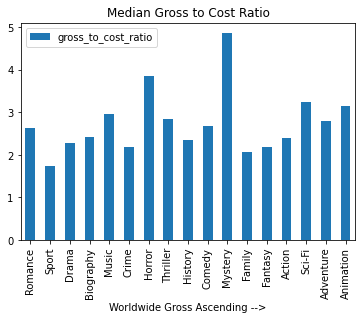

In [134]:
"""To make conclusions for Microsoft, I want to explore gross to cost ratio, 
and profit at three different levels, the median, max, and min. 
This way we can determine the 'safest' genre to work with, and the 
most likely profitable. We can also determine which type of movie could
be a high risk high reward. """

MedbygenGtC = median_by_genre.plot(y = 'gross_to_cost_ratio', kind = 'bar',
                     xlabel = 'Worldwide Gross Ascending -->',
                     title = 'Median Gross to Cost Ratio');
plt.savefig('./images/MedbygenGtC.png')
plt.close('MedbygenGtC.png')

"""While Mystery looks good here, when we look at profit, we realize that 
Mysteries move back toward the middle of the pack. """

'We can start to conclude that Sci-fi, Adventure, and Animation are all in \nthe top 5 of both graphs.'

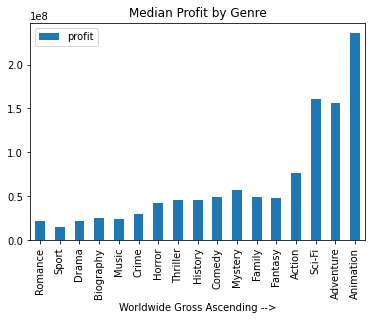

In [135]:
medbygenprof = median_by_genre.plot(y = 'profit', kind = 'bar', 
                     xlabel = 'Worldwide Gross Ascending -->',
                     title = 'Median Profit by Genre');
plt.savefig('./images/Medbygenprof.png')
plt.close('Medbygenprof.png')
"""We can start to conclude that Sci-fi, Adventure, and Animation are all in 
the top 5 of both graphs.""" 

'Outliers in the Mystery, Horror, and Thriller have an incredibly high \ngross-to-cost-ratio. These are all the result of one movie, explored below.'

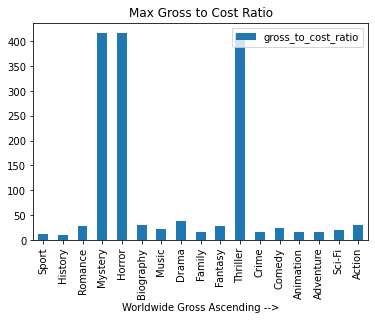

In [136]:
max_by_genre.plot(y = 'gross_to_cost_ratio', kind = 'bar',
                     xlabel = 'Worldwide Gross Ascending -->',
                     title = 'Max Gross to Cost Ratio');
plt.savefig('./images/MaxbygenGtC.png')
plt.close('MaxbygenGtC.png')
"""Outliers in the Mystery, Horror, and Thriller have an incredibly high 
gross-to-cost-ratio. These are all the result of one movie, explored below."""

In [137]:
movie_info[movie_info['gross_to_cost_ratio'] >100]

"""Seeing as how the Gallows is the only movie greater than 102 of a gross_to
_cost_ratio, we will throw away that outlier. Likely the production budget is
missing a zero, causing a factor of 10 error."""

'Seeing as how the Gallows is the only movie greater than 102 of a gross_to\n_cost_ratio, we will throw away that outlier. Likely the production budget is\nmissing a zero, causing a factor of 10 error.'

'Again we see Sci-fi, Adventure, Animation in the top 5. Bars appear at the \nsame height because the movie with the max will have more than one genre tag\nin this case the max profit was an adventure, sci-fi, action movie. '

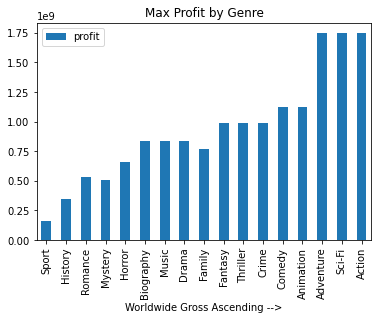

In [138]:
max_by_genre.plot(y = 'profit', kind = 'bar', 
                     xlabel = 'Worldwide Gross Ascending -->',
                     title = 'Max Profit by Genre');
plt.savefig('./images/Maxbygenprof.png')
plt.close('Maxbygenprof.png')
"""Again we see Sci-fi, Adventure, Animation in the top 5. Bars appear at the 
same height because the movie with the max will have more than one genre tag
in this case the max profit was an adventure, sci-fi, action movie. """

"This graph tells us about what would happen if our movie were to flop by \ngenre. While anything under a ratio of 1 means we didn't profit, we can see \nthat some flops are worse than others. We again see that Sci-fi and Animation \nin the event of a flop, are only going to lose at most 65 to 70% based on \nour data. "

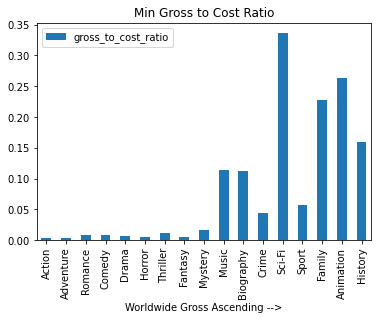

In [139]:
min_by_genre.plot(y = 'gross_to_cost_ratio', kind = 'bar',
                     xlabel = 'Worldwide Gross Ascending -->',
                     title = 'Min Gross to Cost Ratio');
plt.savefig('./images/MinbygenGtC.png')
plt.close('MinbygenGtC.png')
"""This graph tells us about what would happen if our movie were to flop by 
genre. While anything under a ratio of 1 means we didn't profit, we can see 
that some flops are worse than others. We again see that Sci-fi and Animation 
in the event of a flop, are only going to lose at most 65 to 70% based on 
our data. """

'I wanted to compare movies with high profits to see if there were any \nany significant difference in the range of runtimes of the movies. We \ndetermine that most movies that generate higher profits fall between 90 and \n150 minutes, but also most movies that generate less profit (the last plot) \nalso fall in that time frame. '

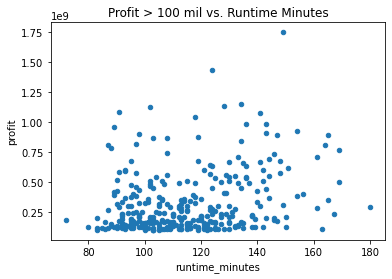

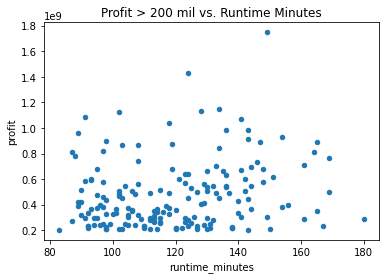

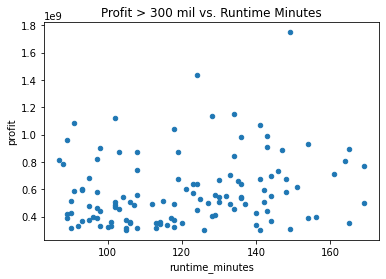

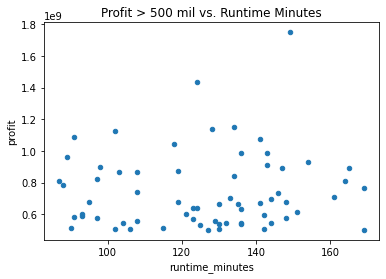

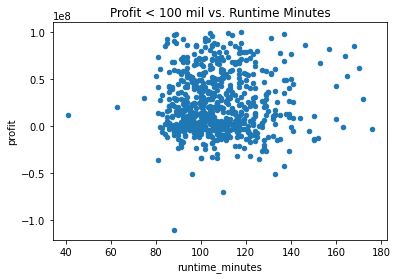

In [140]:
prof1 = movie_info[movie_info['profit'] > 100000000].plot(x = 'runtime_minutes', 
                        y = 'profit', kind = 'scatter',
                        title = 'Profit > 100 mil vs. Runtime Minutes');
plt.savefig('./images/Prof1.png')
plt.close('Prof1.png')

prof2 = movie_info[movie_info['profit'] > 200000000].plot(x = 'runtime_minutes', 
                        y = 'profit', kind = 'scatter',
                        title = 'Profit > 200 mil vs. Runtime Minutes');
plt.savefig('./images/Prof2.png')
plt.close('Prof2.png')

prof3 = movie_info[movie_info['profit'] > 300000000].plot(x = 'runtime_minutes', 
                        y = 'profit', kind = 'scatter',
                        title = 'Profit > 300 mil vs. Runtime Minutes');
plt.savefig('./images/Prof3.png')
plt.close('Prof3.png')

prof4 = movie_info[movie_info['profit'] > 500000000].plot(x = 'runtime_minutes', 
                        y = 'profit', kind = 'scatter',
                        title = 'Profit > 500 mil vs. Runtime Minutes');
plt.savefig('./images/Prof4.png')
plt.close('Prof4.png')
prof5 = movie_info[movie_info['profit'] < 100000000].plot(x = 'runtime_minutes', 
                        y = 'profit', kind = 'scatter',
                        title = 'Profit < 100 mil vs. Runtime Minutes');

plt.savefig('./images/Prof5.png')
plt.close('Prof5.png')

"""I wanted to compare movies with high profits to see if there were any 
any significant difference in the range of runtimes of the movies. We 
determine that most movies that generate higher profits fall between 90 and 
150 minutes, but also most movies that generate less profit (the last plot) 
also fall in that time frame. """

In [141]:
"""Check to see what profit correlates best with. Obviously, profit correlates
most with gross either domestic or worldwise, but surprisingly we see that 
profit has a somewhat significant correlation with budget at .648. Profit
also surprisingly has almost not correlation with gross-to-cost ratio. This
means that the more Microsoft spends on its budget, statistically the higher
the profit will go. """
movie_info.corr()



,domestic_gross_x,year,start_year,runtime_minutes,id,production_budget,domestic_gross_y,worldwide_gross,gross_to_cost_ratio,profit
domestic_gross_x,1.000000,0.103828,0.103828,0.276856,-0.044136,0.688917,0.999987,0.938842,0.065553,0.934438
year,0.103828,1.000000,1.000000,0.133445,0.041758,0.055248,0.104887,0.116309,0.030864,0.124435
start_year,0.103828,1.000000,1.000000,0.133445,0.041758,0.055248,0.104887,0.116309,0.030864,0.124435
runtime_minutes,0.276856,0.133445,0.133445,1.000000,-0.011095,0.337439,0.277117,0.301699,-0.075795,0.266877
id,-0.044136,0.041758,0.041758,-0.011095,1.000000,-0.085766,-0.043650,-0.061297,0.037926,-0.049267
production_budget,0.688917,0.055248,0.055248,0.337439,-0.085766,1.000000,0.688999,0.775507,-0.075055,0.647808
domestic_gross_y,0.999987,0.104887,0.104887,0.277117,-0.043650,0.688999,1.000000,0.938827,0.065787,0.934433
worldwide_gross,0.938842,0.116309,0.116309,0.301699,-0.061297,0.775507,0.938827,1.000000,0.054223,0.983336
gross_to_cost_ratio,0.065553,0.030864,0.030864,-0.075795,0.037926,-0.075055,0.065787,0.054223,1.000000,0.087040
profit,0.934438,0.124435,0.124435,0.266877,-0.049267,0.647808,0.934433,0.983336,0.087040,1.000000


In [142]:
spec_box = movie_info[movie_info['profit'] > 100000000]
spec_box2 = exploded_movies[exploded_movies['profit'] > 100000000]
spec_box3 = spec_box2[spec_box2['genres'] == 'Animation']

In [143]:
genre_index

,runtime_minutes,production_budget,domestic_gross_y,worldwide_gross,gross_to_cost_ratio,profit
genres,,,,,,
Adventure,103.0,200000000,415004880,1068879522,5.344398,868879522
Animation,103.0,200000000,415004880,1068879522,5.344398,868879522
Comedy,103.0,200000000,415004880,1068879522,5.344398,868879522
Action,148.0,160000000,292576195,835524642,5.222029,675524642
Adventure,148.0,160000000,292576195,835524642,5.222029,675524642
...,...,...,...,...,...,...
Crime,112.0,10000000,4286367,6089100,0.608910,-3910900
Drama,112.0,10000000,4286367,6089100,0.608910,-3910900
Action,121.0,6000000,1214525,1427656,0.237943,-4572344


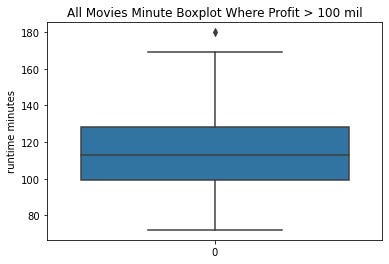

In [144]:
runtimebox = sns.boxplot(data = spec_box['runtime_minutes']).set(
    ylabel = 'runtime minutes', 
    title = 'All Movies Minute Boxplot Where Profit > 100 mil');
plt.savefig('./images/runtimebox.png')
plt.close('runtimebox.png')

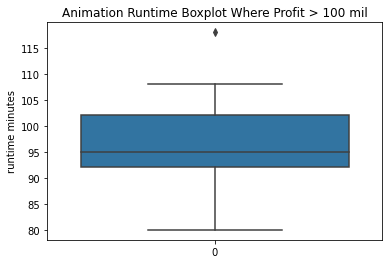

In [145]:
runtimebox2 = sns.boxplot(data = spec_box3['runtime_minutes']).set(
    ylabel = 'runtime minutes', 
    title = 'Animation Runtime Boxplot Where Profit > 100 mil');
plt.savefig('./images/runtimebox2.png')
plt.close('runtimebox2.png')

## Evaluation

The model fits the data well. I am confident that the results would 
generalize in most cases, but one cannot predict the success of a movie
based solely on genre. A major new factor in this industry is the effec5 that streaming services have had on movie income. I am confident that the genre and runtime that I ultimately conclude that Microsoft should go with would benefit the business if they also filled all the needed roles to make this project happen with people who know the industry well. 

My work solves the business problem of which movie type Microsoft should 
invest in creating in order to make a significant amount of money while
limiting the risk. 

## Conclusions

Based on the results, my top recommendation for Microsoft as a company is to start with an animation movie. We can tall by both the max genre and the median genre that both profit and gross to cost ratio are high. From the min graph, we can see that its flops will lose only 65 - 70% making animation less risky than most alternatives and a safe venture with likely profit and low downside. 

Microsoft also has software and a team that can easily transition into the field of animation. This would likely cut startup cost. 

Based on the profit vs runtime minute graphs, movies that have a profit of more than 100 million mostly fall between 90 and 150 minutes with a median of 112. However, the animation median is 95 minutes, so the recommendation is to follow to this median and set a animation movie length between 90 and 105 minutes. 

Profit is most correlated with budget. So we recognize Microsoft as a company that could potential have an almost unlimited budget and for success in the movie we recommend an approximate 10-15 million dollar budget for your movie as this is the mean budget of an animation film. 

We are limited in our results, and for future movies would be able to provide more specific recommendations.

Limiting factors in our results included throwing out Westerns, War, Documentaries, and Musicals with too few data points. We have a small sample size of movies within an approximate 10 year team period and they may suffer from recency bias. We did not connect success (profit) with directors, authors, or crew, and we could create a short list of those to make a determination of whom to hire. Most importantly however, we did not look at the effect that streaming services have had on the industry and whether Microsoft should target Theater Releases, or Streaming Releases. 

Suggestions for our future exploration include: 
1. Expand our data to more than the most recent 10 years. 
2. Do a similar data analysis but separate movies by streaming and by theater release. 
3. Connect author, producer, and director to our data and analyze the importance of those people into our selection. 

I have confidence in my initial suggestion, but would love to explore further into this world to continue giving recommendations as Microsoft develops its studio. 